###  디클라제(SGD20015) 충전 결과 분석
- 목적 : 해당 배치의 충전 수율이 떨어진 원인을 조사하기 위함

- 분석 대상 : SGD20015
- 대조군 : SGD20013
- 충전 목표량 : 0.0140g (0.0132g ~ 0.0148g)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 8
rcParams['font.family'] = 'New Gulim'
rcParams['font.size'] = 20
rcParams['axes.unicode_minus'] = False


In [2]:
# Machine Learning Library

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split

# accuracy measure
from sklearn import metrics

In [110]:
# 일탈 배치 SGD20015 를 Load 함

sgd = pd.read_excel('data/SGD20015.xlsx')
sgd

,DATE,TIME,CODE,COUNT,CH-A DATA,UNIT,STATE,CODE.1,COUNT.1,CH-B DATA,...,UNIT.2,STD,AVE,MIN,MAX,MAX-MIN,ERROR,OVER,LOWER,UPPER
0,2020-10-23,08:40:05,14,1,0.0138,g,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-10-23,08:40:12,14,2,0.0140,g,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-10-23,08:40:18,14,3,0.0135,g,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-10-23,08:40:24,14,4,0.0129,g,L,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-10-23,08:40:30,14,5,0.0135,g,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4394,2020-10-23,18:23:55,14,4395,0.0021,g,L,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4395,2020-10-23,18:24:02,14,4396,0.0030,g,L,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4396,2020-10-23,18:24:09,14,4397,0.0021,g,L,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4397,2020-10-23,18:24:17,14,4398,0.0041,g,L,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
# 정상 배치 SGD20013 을 Load함

sgd2 = pd.read_excel('data/SGD20013.xlsx')
sgd2

,DATE,TIME,CODE,COUNT,CH-A DATA,UNIT,STATE,CODE.1,COUNT.1,CH-B DATA,...,UNIT.2,STD,AVE,MIN,MAX,MAX-MIN,ERROR,OVER,LOWER,UPPER
0,2020-09-23,08:22:04,14,1,0.0100,g,L,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-09-23,08:22:29,14,2,0.0129,g,L,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-09-23,08:23:09,14,3,0.0131,g,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-09-23,08:23:35,14,4,0.0142,g,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-09-23,08:35:52,14,5,0.0148,g,U,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4526,2020-09-23,18:26:21,14,4527,0.0058,g,L,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4527,2020-09-23,18:26:27,14,4528,0.0052,g,L,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4528,2020-09-23,18:26:33,14,4529,0.0029,g,L,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4529,2020-09-23,18:26:39,14,4530,0.0023,g,L,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
col_list = ['TIME','COUNT','CH-A DATA','STATE']

In [44]:
df = sgd[col_list]
df

,TIME,COUNT,CH-A DATA,STATE
0,08:40:05,1,0.0138,NaN
1,08:40:12,2,0.0140,NaN
2,08:40:18,3,0.0135,NaN
3,08:40:24,4,0.0129,L
4,08:40:30,5,0.0135,NaN
...,...,...,...,...
4394,18:23:55,4395,0.0021,L
4395,18:24:02,4396,0.0030,L
4396,18:24:09,4397,0.0021,L
4397,18:24:17,4398,0.0041,L


In [103]:
df2 = sgd2[col_list]
df2

,TIME,COUNT,CH-A DATA,STATE
0,08:22:04,1,0.0100,L
1,08:22:29,2,0.0129,L
2,08:23:09,3,0.0131,NaN
3,08:23:35,4,0.0142,NaN
4,08:35:52,5,0.0148,U
...,...,...,...,...
4526,18:26:21,4527,0.0058,L
4527,18:26:27,4528,0.0052,L
4528,18:26:33,4529,0.0029,L
4529,18:26:39,4530,0.0023,L


In [70]:
# Typenumber 추가
# 0 -> 미량충전 / 1 -> 정상 / 2 -> 과충전

df['TypeNum'] = df['STATE'].apply(lambda x: 0 if x == 'L' else 2 if x == 'U' else 1)
df

<ipython-input-70-7aeae4b3a2fb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TypeNum'] = df['STATE'].apply(lambda x: 0 if x == 'L' else 2 if x == 'U' else 1)


,TIME,COUNT,CH-A DATA,STATE,TypeNum
0,08:40:05,1,0.0138,NaN,1
1,08:40:12,2,0.0140,NaN,1
2,08:40:18,3,0.0135,NaN,1
3,08:40:24,4,0.0129,L,0
4,08:40:30,5,0.0135,NaN,1
...,...,...,...,...,...
4394,18:23:55,4395,0.0021,L,0
4395,18:24:02,4396,0.0030,L,0
4396,18:24:09,4397,0.0021,L,0
4397,18:24:17,4398,0.0041,L,0


In [104]:
df2['TypeNum'] = df2['STATE'].apply(lambda x: 0 if x == 'L' else 2 if x == 'U' else 1)
df2

<ipython-input-104-1c0361cdd54d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TypeNum'] = df2['STATE'].apply(lambda x: 0 if x == 'L' else 2 if x == 'U' else 1)


,TIME,COUNT,CH-A DATA,STATE,TypeNum
0,08:22:04,1,0.0100,L,0
1,08:22:29,2,0.0129,L,0
2,08:23:09,3,0.0131,NaN,1
3,08:23:35,4,0.0142,NaN,1
4,08:35:52,5,0.0148,U,2
...,...,...,...,...,...
4526,18:26:21,4527,0.0058,L,0
4527,18:26:27,4528,0.0052,L,0
4528,18:26:33,4529,0.0029,L,0
4529,18:26:39,4530,0.0023,L,0


In [46]:
import seaborn as sns; sns.set()

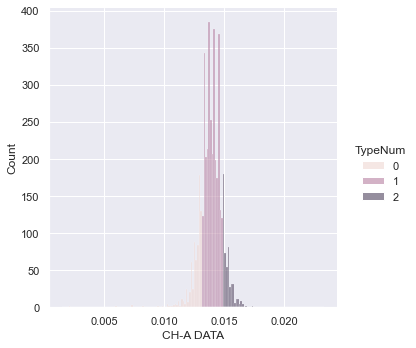

In [107]:
# 일탈 배치 SGD20015

sns.displot(df, x="CH-A DATA", hue="TypeNum")

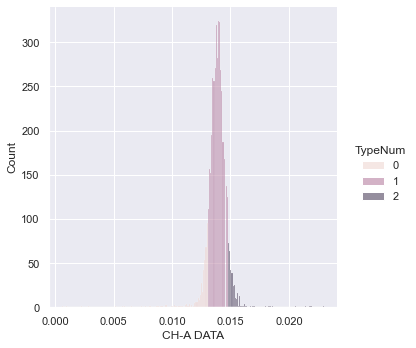

In [108]:
# 정상 배치 SGD20013

sns.displot(df2, x="CH-A DATA", hue="TypeNum")

- SGD20013 (대조군) 은 Type 1(적정충전)의 데이터가 정상형(정규분포)에 가까운 반면
- SGD20015 (일탈)은 Type 1(적정충전)의 데이터가 이빠진형, 쌍봉형에 가까움

In [88]:
# 미량충전, 적정충전, 과충전 수량 확인

pd.value_counts(df["TypeNum"])

1    3094
0     769
2     536
Name: TypeNum, dtype: int64

In [109]:
pd.value_counts(df2["TypeNum"])

1    3780
0     406
2     345
Name: TypeNum, dtype: int64

 - SGD20013 (대조군) 은 SGD20015 (일탈) 와 비교할 때
 - Type 1(적정충전) 수량이 적고, Type 0/2 (소량/과량) 수량이 많음

In [116]:
# 일탈 배치 미량충전, 적정충전, 과충전 Dataframe 분리

df_0 = df.loc[df['TypeNum']==0]
df_1 = df.loc[df['TypeNum']==1]
df_2 = df.loc[df['TypeNum']==2]

In [113]:
# 일탈 배치 미량충전(폐기) 분말 총합 9.5156g

sum(df_0['CH-A DATA'])

9.51559999999999

In [115]:
# 일탈 배치 과충전(폐기) 분말 총합 8.2244g

sum(df_2['CH-A DATA'])

8.224399999999989

In [99]:
# 일탈 배치 충전 못하고 페기된 분말량 : 22.768g

9.5156 + 8.2244 + 1.128 + 3.9

22.767999999999997

일탈 배치 폐기된 양 총합 22.768g

- 9.5156 g : 미량충전(폐기) 분말 총합  
- 8.2244 g : 과충전(폐기) 분말 총합   
- 1.128  g : 메인 호퍼 내부 잔류 분말량 
- 3.9    g : Auger 잔류 분말량

In [119]:
# 정상 배치 미량충전, 적정충전, 과충전 Dataframe 분리

df2_0 = df2.loc[df2['TypeNum']==0]
df2_1 = df2.loc[df2['TypeNum']==1]
df2_2 = df2.loc[df2['TypeNum']==2]

In [128]:
# 정상 배치 미량충전(폐기) 분말 총합 4.9912g

sum(df2_0['CH-A DATA'])

4.9911999999999965

In [130]:
# 정상 배치 과충전(폐기) 분말 총합 5.2780g

sum(df2_2['CH-A DATA'])

5.277999999999999

In [139]:
# 정상 배치 충전 못하고 페기된 분말량 : 15.475g

4.9912 + 5.2780 + 1.206 + 4.0

15.4752

정상 배치 폐기된 양 총합 15.297g

- 4.9912 g : 미량충전(폐기) 분말 총합  
- 5.2780 g : 과충전(폐기) 분말 총합   
- 1.206  g : 메인 호퍼 내부 잔류 분말량 
- 4.0    g : Auger 잔류 분말량

 폐기량 비교

In [136]:
# SGD20015 (일탈) 은 SGD20013(대조군) 보다 충전 불량으로 인한 폐기량이 7.471g 많음

sum(df_0['CH-A DATA']) + sum(df_2['CH-A DATA']) - (sum(df2_0['CH-A DATA']) + sum(df2_2['CH-A DATA']))

7.470799999999986

적정 충전량 비교

In [127]:
# 일탈 배치 적정충전 분말 총합 43.2613g

sum(df_1['CH-A DATA'])

43.261300000000034

In [129]:
# 정상 배치 적정충전 분말 총합 52.5540g

sum(df2_1['CH-A DATA'])

52.55400000000001

일탈 배치

- 66 g (총 분말량) = 43.2613g (충전된 양) + 22.768g (폐기된 양)

In [146]:
43.2613 + 22.768

66.0293

정상 배치

- 68 g (총 분말량) = 52.5540g (충전된 양) + 15.475g (폐기된 양)

In [147]:
52.5540 + 15.475

68.029

--- end of script ---